In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [5]:
import numpy as np
from PIL import Image
import os

data = []
labels = []
classes = 43 
cur_path = os.getcwd() 

for i in range(classes): 
    path = os.path.join(cur_path, 'train', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        try: 
            image = Image.open(os.path.join(path, a)) 
            image = image.resize((30, 30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except: 
            print("Error loading image") 

data = np.array(data)
labels = np.array(labels)


In [6]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:


# Define the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model with validation data
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))

# Save the model
model.save("my_model.h5")


c:\Users\Giri\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 30ms/step - accuracy: 0.3088 - loss: 3.4844 - val_accuracy: 0.9005 - val_loss: 0.4390
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8038 - loss: 0.6866 - val_accuracy: 0.9452 - val_loss: 0.2053
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.8806 - loss: 0.4160 - val_accuracy: 0.9652 - val_loss: 0.1215
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8974 - loss: 0.3537 - val_accuracy: 0.9748 - val_loss: 0.0876
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9182 - loss: 0.2930 - val_accuracy: 0.9842 - val_loss: 0.0610
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9285 - loss: 0.2648 - val_accuracy: 0.9778 - val_loss: 0.0840
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9307 - loss: 0.2458 - val_accuracy: 0.9844 - val_loss: 0.0605
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9295 - loss: 0.2563 - 

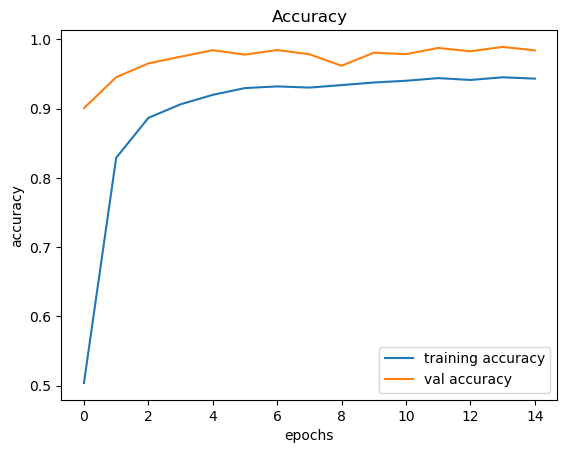

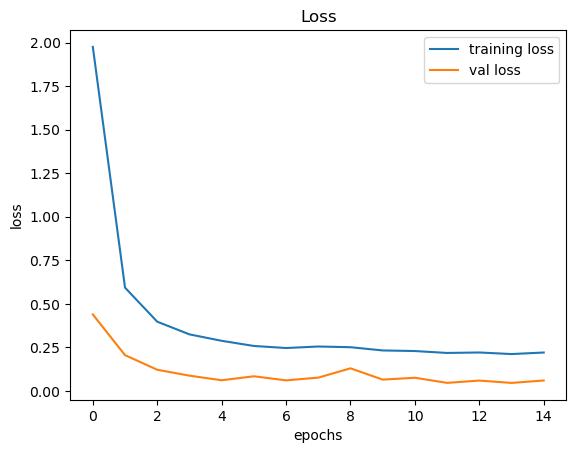

In [12]:
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np

# Load test data
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

# Predict
pred_probabilities = model.predict(X_test)
pred = np.argmax(pred_probabilities, axis=1)

# Calculate accuracy
print(accuracy_score(labels, pred))

# Save the model
model.save('traffic_classifier.h5')


395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


0.9507521773555028


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Giri\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Giri\AppData\Local\Temp\ipykernel_34016\290145489.py", line 76, in <lambda>
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
                                                                    ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Giri\AppData\Local\Temp\ipykernel_34016\290145489.py", line 70, in classify
    pred = model.predict_classes([image])[0]
           ^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'Sequential' object has no attribute 'predict_classes'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Giri\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Giri\AppData\Local\Temp\ipykernel_34016\290145489.

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
from keras.models import load_model

# Load the trained model to classify signs
model = load_model('traffic_classifier.h5')

# Dictionary to label all traffic sign classes
classes = {1: 'Speed limit (20km/h)',
           2: 'Speed limit (30km/h)',
           3: 'Speed limit (50km/h)',
           4: 'Speed limit (60km/h)',
           5: 'Speed limit (70km/h)',
           6: 'Speed limit (80km/h)',
           7: 'End of speed limit (80km/h)',
           8: 'Speed limit (100km/h)',
           9: 'Speed limit (120km/h)',
           10: 'No passing',
           11: 'No passing vehicle over 3.5 tons',
           12: 'Right-of-way at intersection',
           13: 'Priority road',
           14: 'Yield',
           15: 'Stop',
           16: 'No vehicles',
           17: 'Vehicle > 3.5 tons prohibited',
           18: 'No entry',
           19: 'General caution',
           20: 'Dangerous curve left',
           21: 'Dangerous curve right',
           22: 'Double curve',
           23: 'Bumpy road',
           24: 'Slippery road',
           25: 'Road narrows on the right',
           26: 'Road work',
           27: 'Traffic signals',
           28: 'Pedestrians',
           29: 'Children crossing',
           30: 'Bicycles crossing',
           31: 'Beware of ice/snow',
           32: 'Wild animals crossing',
           33: 'End speed + passing limits',
           34: 'Turn right ahead',
           35: 'Turn left ahead',
           36: 'Ahead only',
           37: 'Go straight or right',
           38: 'Go straight or left',
           39: 'Keep right',
           40: 'Keep left',
           41: 'Roundabout mandatory',
           42: 'End of no passing',
           43: 'End no passing vehicle with a weight greater than 3.5 tons'}

# Initialise GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred_probabilities = model.predict(image)
    pred = np.argmax(pred_probabilities, axis=1)
    sign = classes[pred[0] + 1]
    print(sign)
    label.configure(foreground='#011638', text=sign)

def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
        im = ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload = Button(top, text="Upload an image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)
sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)
heading = Label(top, text="Check traffic sign", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()
top.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
Turn right ahead
